In [72]:
import numpy as np
import gym
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (9,9)

In [2]:
# Make env
env = gym.make("CarRacing-v1", continuous=False)

In [3]:
# Render
observation, info = env.reset(seed=42, return_info=True)
env.render();

True Speed: 16.665337762188273


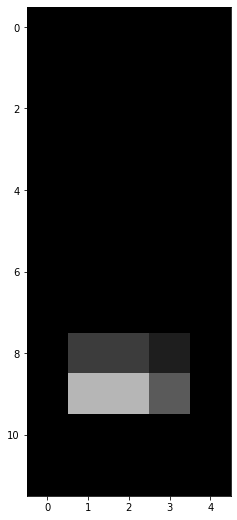

In [73]:
#action = env.action_space.sample()
action = 3
observation, reward, done, info = env.step(action)

if done:
    print("Done!")
    observation, info = env.reset(return_info=True)

env.render()


true_speed = np.sqrt(np.square(env.car.hull.linearVelocity[0]) + np.square(env.car.hull.linearVelocity[1]))
print(f"True Speed: {true_speed}")

speed_pixels = observation[-12:,11:11+5,:]
plt.imshow(speed_pixels);

#all_speeds.append(speed)

# Sensor Calculations

### Speed Sensors
For now we will use the true speed (cheating alert!) from the environment. If this works we can use computer vision to read the speed from the screen.

In [76]:
true_speed = np.sqrt(np.square(env.car.hull.linearVelocity[0]) + np.square(env.car.hull.linearVelocity[1]))
print(f"Speed Sensor: {true_speed}")

Speed Sensor: 16.665337762188273


## Direction Sensors

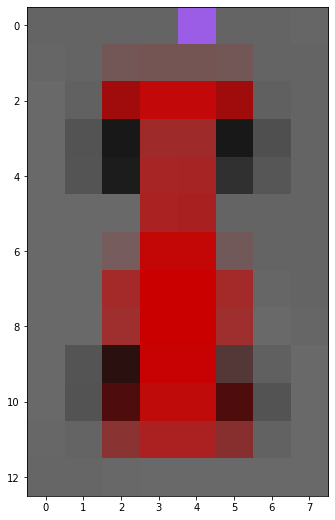

In [690]:
# Sensors
sensor_observation = observation.copy()

# Print Sensor Location
car_front = [65, 48]

# Sensor Color
sensor_observation[65, 48, 0] = 155
sensor_observation[65, 48, 1] = 93
sensor_observation[65, 48, 2] = 229

car = sensor_observation[65:78,44:52,:]
plt.imshow(car);

### Front Sensor

In [691]:
# Is road
def is_road(pixel):
    if pixel[1]>pixel[0]*1.3 and pixel[1]>pixel[2]*1.3:
        # Not grey (probably?)
        return False
    else:
        return True

We will add a sensor in the front of the car. This will only work once the camera stabilizes. The sensor location is shown in purple.

In [720]:
# Front Sensor
def get_front_sensor(observation, car_front):
    for i in range(car_front[0]):
        pixel = observation[car_front[0]-i, car_front[1], :]
        if not is_road(pixel):
            return i
    return car_front[0]

Front Sensor: 65


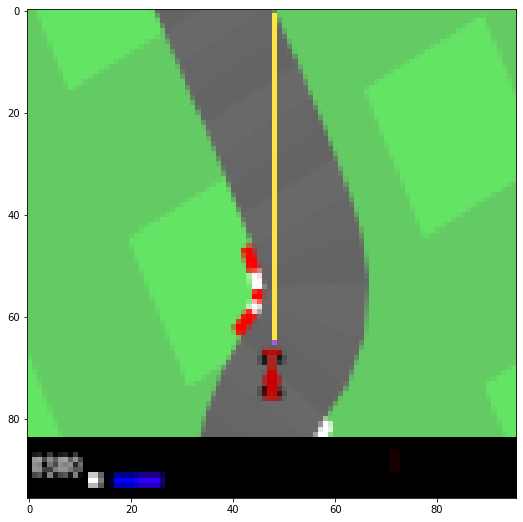

In [693]:
# Front Sensor
front_sensor_output = get_front_sensor(observation, car_front)

for i in range(1, front_sensor_output):
    sensor_observation[car_front[0]-i, car_front[1], 0] = 254
    sensor_observation[car_front[0]-i, car_front[1], 1] = 228
    sensor_observation[car_front[0]-i, car_front[1], 2] = 64

print(f"Front Sensor: {front_sensor_output}")
plt.imshow(sensor_observation);

### Left Sensor

In [694]:
# Front Left Sensor
def get_left_sensor(observation, car_front):
    for i in range(car_front[0]):
        pixel = observation[car_front[0]-i, car_front[1]-i//4, :]
        if not is_road(pixel):
            return i
    return car_front[0]

def get_full_left_sensor(observation, car_front):
    for i in range(car_front[1]):
        pixel = observation[car_front[0], car_front[1]-i, :]
        if not is_road(pixel):
            return i
    return car_front[1]

Left Sensor: 20
Full Left Sensor: 7


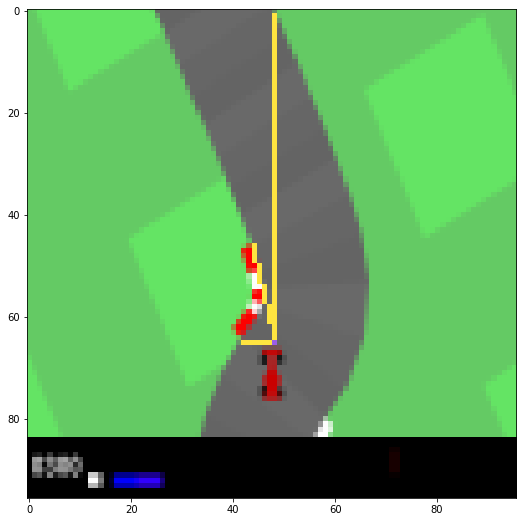

In [695]:
# Front Left Sensor
left_sensor_output = get_left_sensor(observation, car_front)
full_left_sensor_output = get_full_left_sensor(observation, car_front)

for i in range(1, left_sensor_output):
    sensor_observation[car_front[0]-i, car_front[1]-i//4, 0] = 254
    sensor_observation[car_front[0]-i, car_front[1]-i//4, 1] = 228
    sensor_observation[car_front[0]-i, car_front[1]-i//4, 2] = 64

for i in range(1, full_left_sensor_output):
    sensor_observation[car_front[0], car_front[1]-i, 0] = 254
    sensor_observation[car_front[0], car_front[1]-i, 1] = 228
    sensor_observation[car_front[0], car_front[1]-i, 2] = 64

print(f"Left Sensor: {left_sensor_output}")
print(f"Full Left Sensor: {full_left_sensor_output}")
plt.imshow(sensor_observation);

### Right Sensor

In [722]:
# Front Right Sensor
def get_right_sensor(observation, car_front):
    for i in range(car_front[0]):

        pixel = observation[car_front[0]-i, car_front[1]+i//4, :]
        if not is_road(pixel):
            return i
    return car_front[0]

def get_full_right_sensor(observation, car_front):
    for i in range(96-car_front[1]):

        pixel = observation[car_front[0], car_front[1]+i, :]
        if not is_road(pixel):
            return i
    return 96-car_front[1]

Right Sensor: 20
Full Right Sensor: 13


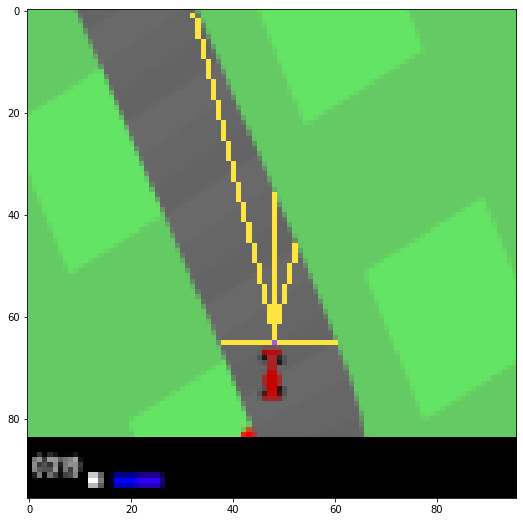

In [723]:
# Front Right Sensor
right_sensor_output = get_right_sensor(observation, car_front)
full_right_sensor_output = get_full_right_sensor(observation, car_front)

for i in range(1, right_sensor_output):
    sensor_observation[car_front[0]-i, car_front[1]+i//4, 0] = 254
    sensor_observation[car_front[0]-i, car_front[1]+i//4, 1] = 228
    sensor_observation[car_front[0]-i, car_front[1]+i//4, 2] = 64

for i in range(1, full_right_sensor_output):
    sensor_observation[car_front[0], car_front[1]+i, 0] = 254
    sensor_observation[car_front[0], car_front[1]+i, 1] = 228
    sensor_observation[car_front[0], car_front[1]+i, 2] = 64

print(f"Right Sensor: {right_sensor_output}")
print(f"Full Right Sensor: {full_right_sensor_output}")
plt.imshow(sensor_observation);

In [724]:
### Simple Sensors 

# Select Action
# 0=do_nothing, 1=right, 2=left, 3=gas, 4=brake
action = 0

# Step
observation, reward, done, info = env.step(action)

if done:
    print("Done!")
    observation, info = env.reset(return_info=True)

env.render()

# Sensors
true_speed = np.sqrt(np.square(env.car.hull.linearVelocity[0]) + np.square(env.car.hull.linearVelocity[1]))
front_sensor_output = get_front_sensor(observation, car_front)
left_sensor_output = get_left_sensor(observation, car_front)
full_left_sensor_output = get_full_left_sensor(observation, car_front)
right_sensor_output = get_right_sensor(observation, car_front)
full_right_sensor_output = get_full_right_sensor(observation, car_front)

print(f"Speed Sensor: {true_speed}")
print(f"Front Sensor: {front_sensor_output}")
print(f"Left Sensor: {left_sensor_output}")
print(f"Full Left Sensor: {full_left_sensor_output}")
print(f"Right Sensor: {right_sensor_output}")
print(f"Full Right Sensor: {full_right_sensor_output}")

Speed Sensor: 48.49329612454263
Front Sensor: 28
Left Sensor: 63
Full Left Sensor: 12
Right Sensor: 18
Full Right Sensor: 12


: 

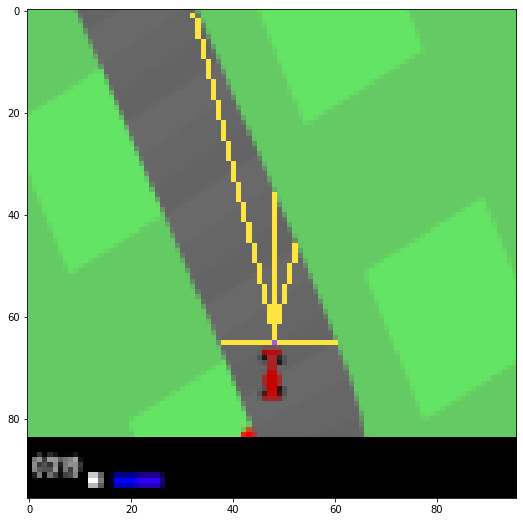

In [719]:
# Sensors
sensor_observation = observation.copy()

# Print Sensor Location
car_front = [65, 48]

# Sensor Color
sensor_observation[65, 48, 0] = 155
sensor_observation[65, 48, 1] = 93
sensor_observation[65, 48, 2] = 229

for i in range(1, right_sensor_output):
    sensor_observation[car_front[0]-i, car_front[1]+i//4, 0] = 254
    sensor_observation[car_front[0]-i, car_front[1]+i//4, 1] = 228
    sensor_observation[car_front[0]-i, car_front[1]+i//4, 2] = 64

for i in range(1, left_sensor_output):
    sensor_observation[car_front[0]-i, car_front[1]-i//4, 0] = 254
    sensor_observation[car_front[0]-i, car_front[1]-i//4, 1] = 228
    sensor_observation[car_front[0]-i, car_front[1]-i//4, 2] = 64

for i in range(1, front_sensor_output):
    sensor_observation[car_front[0]-i, car_front[1], 0] = 254
    sensor_observation[car_front[0]-i, car_front[1], 1] = 228
    sensor_observation[car_front[0]-i, car_front[1], 2] = 64

for i in range(1, full_right_sensor_output):
    sensor_observation[car_front[0], car_front[1]+i, 0] = 254
    sensor_observation[car_front[0], car_front[1]+i, 1] = 228
    sensor_observation[car_front[0], car_front[1]+i, 2] = 64

for i in range(1, full_left_sensor_output):
    sensor_observation[car_front[0], car_front[1]-i, 0] = 254
    sensor_observation[car_front[0], car_front[1]-i, 1] = 228
    sensor_observation[car_front[0], car_front[1]-i, 2] = 64

plt.imshow(sensor_observation);

### Extra Sensors
Maybe a sensor to show the car there's void in front could help